In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [138]:
path_original = "../../../data/phm_data_challenge/01_M01_DC_train_short.csv"
df_original = pd.read_csv(path_original)

# Visualisation - New Blade

## Scatterplot - original data

In [139]:
df_original = df_original.loc[df_original["time"].between(1600,2000, inclusive=False)]
df_original.shape

(72, 24)

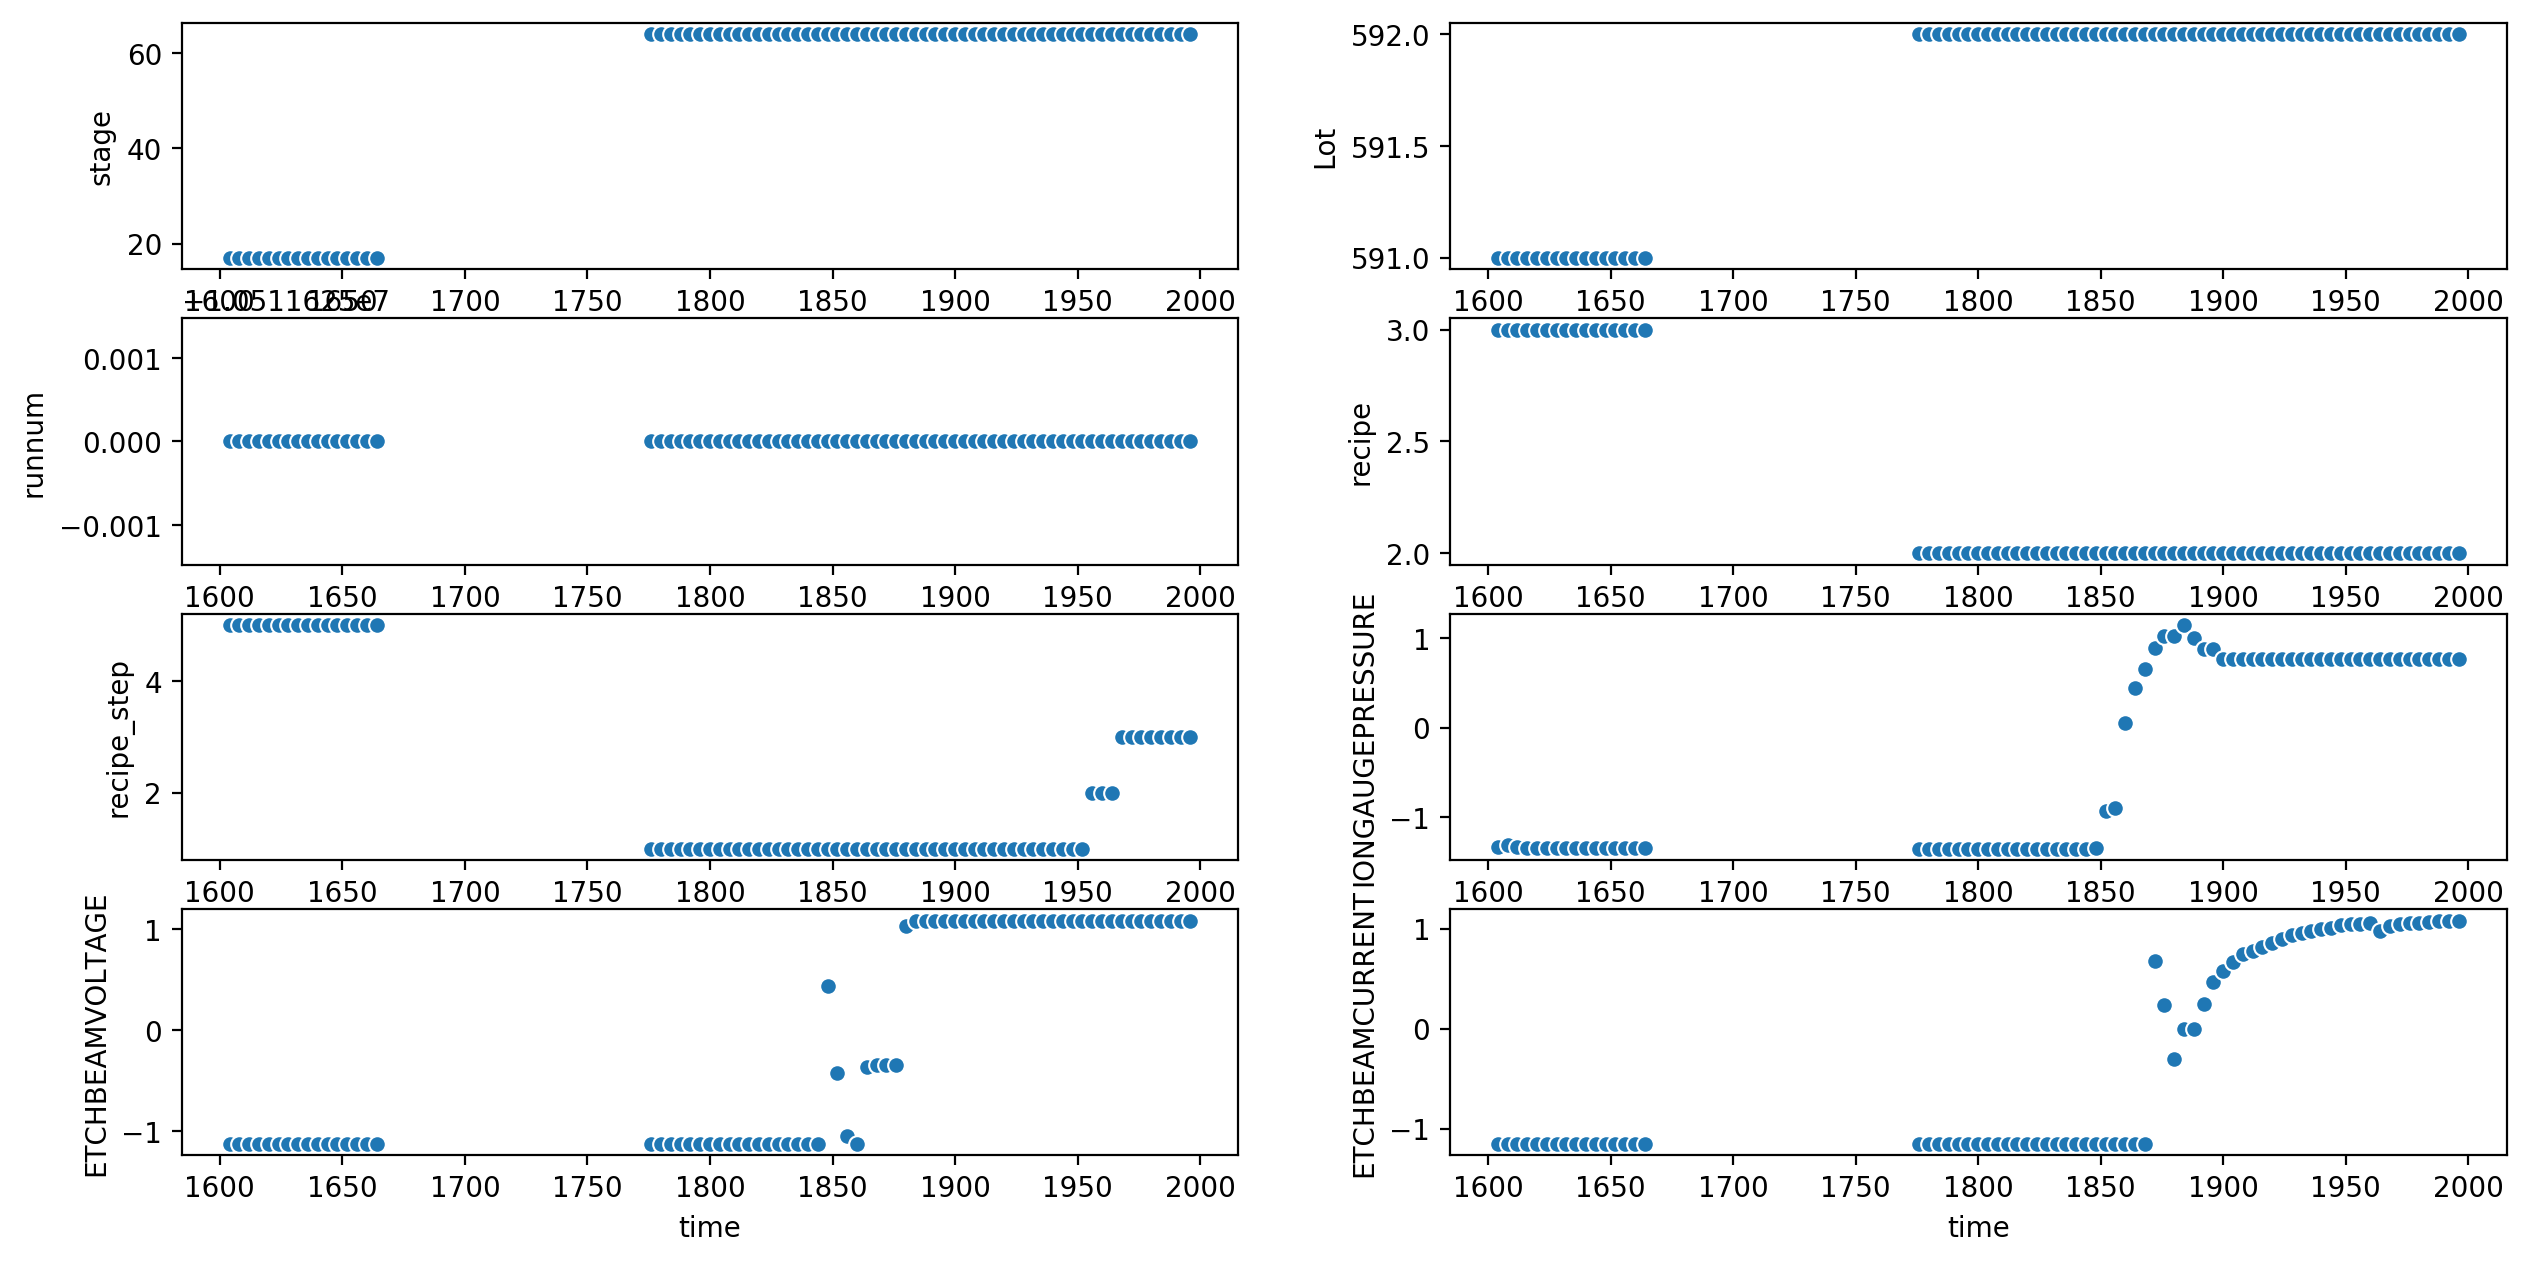

In [140]:
fig, axes = plt.subplots(4, 2, figsize=(15,7.5), dpi=200)
ax = axes.ravel()
plt.subplots_adjust(hspace=0.2, wspace=0.6)
for i in range(2,10):
    sns.scatterplot(x=df_original.iloc[:,0], y=df_original.iloc[:,i], ax=ax[i-2])
#plt.savefig("../graphs/raw_sensor_data.png")
#ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
plt.subplots_adjust(wspace=0.2)
plt.show()

In [142]:
df_original.loc[df_original["time"]==1650]

,time,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,ETCHGASCHANNEL1READBACK,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION


## Some Statistics

In [5]:
df_original.describe()

,time,runnum,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,ETCHSUPPRESSORVOLTAGE,ETCHSUPPRESSORCURRENT,FLOWCOOLFLOWRATE,FLOWCOOLPRESSURE,ETCHGASCHANNEL1READBACK,...,ACTUALROTATIONANGLE,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,FIXTURESHUTTERPOSITION_0.0,FIXTURESHUTTERPOSITION_1.0,FIXTURESHUTTERPOSITION_2.0,FIXTURESHUTTERPOSITION_3.0,FIXTURESHUTTERPOSITION_255.0
count,1.731750e+05,1.731750e+05,173175.000000,173175.000000,173175.000000,173175.000000,173175.000000,173175.000000,173175.000000,173175.000000,...,173175.000000,173175.000000,173175.000000,173175.000000,173175.000000,173175.000000,173175.000000,173175.000000,173175.000000,173175.000000
mean,4.545749e+06,1.058936e+07,-0.000161,0.008829,0.022970,0.105094,0.168269,0.027097,0.037700,0.029967,...,0.012618,-0.539468,0.021509,0.146403,-0.007032,0.455331,0.520248,0.018652,0.005734,0.000035
std,8.300108e+05,5.176236e+04,0.949729,0.963563,0.969981,1.014784,1.075176,0.986165,0.640390,0.984052,...,0.697715,0.839107,0.158815,1.279699,0.857678,0.498002,0.499591,0.135292,0.075507,0.005886
min,3.283106e+06,1.051162e+07,-1.357306,-1.128402,-1.154274,-1.188503,-1.145790,-1.449477,-1.218926,-1.364314,...,-0.152528,-1.679262,-0.257798,-1.590623,-0.847503,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.916670e+06,1.054886e+07,-1.324807,-1.128402,-1.151571,-1.188503,-1.145790,-1.449477,-0.679094,-1.308839,...,-0.152501,-1.549700,-0.114107,-1.394733,-0.444977,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.291194e+06,1.057392e+07,0.499718,-0.184506,0.069821,0.496485,0.351965,0.685750,0.412646,0.376481,...,-0.152495,0.000372,0.024251,0.971663,-0.200587,0.000000,1.000000,0.000000,0.000000,0.000000
75%,5.281396e+06,1.063644e+07,0.761102,1.085495,1.075690,0.497413,1.253511,0.688267,0.432194,0.846716,...,-0.152495,0.167245,0.154147,1.223867,0.086931,1.000000,1.000000,0.000000,0.000000,0.000000
max,6.533184e+06,1.070730e+07,1.286582,1.246803,3.273169,1.420548,1.895685,1.708565,0.861804,1.397132,...,4.767186,0.330199,0.323114,1.470236,4.539868,1.000000,1.000000,1.000000,1.000000,1.000000


## Correlation of sensor time series

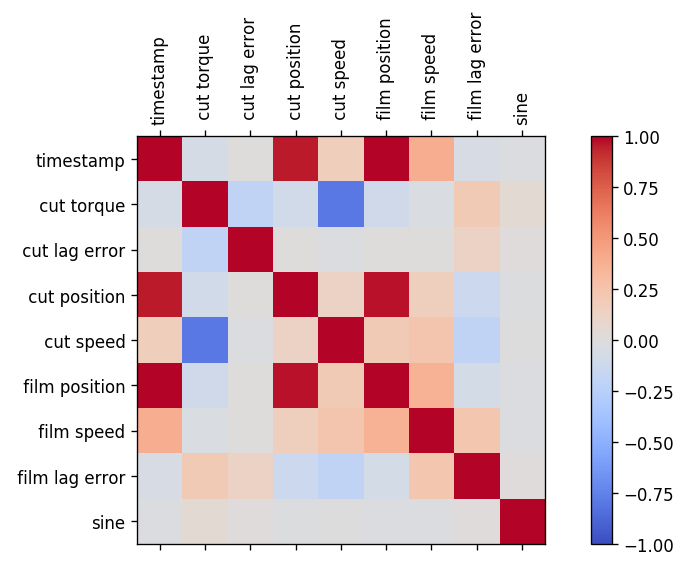

In [6]:
corr = df_original.corr()
fig = plt.figure(figsize=(10,4.5), dpi=120)
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_original.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_original.columns)
ax.set_yticklabels(df_original.columns)
plt.show()

## Autocorrelation

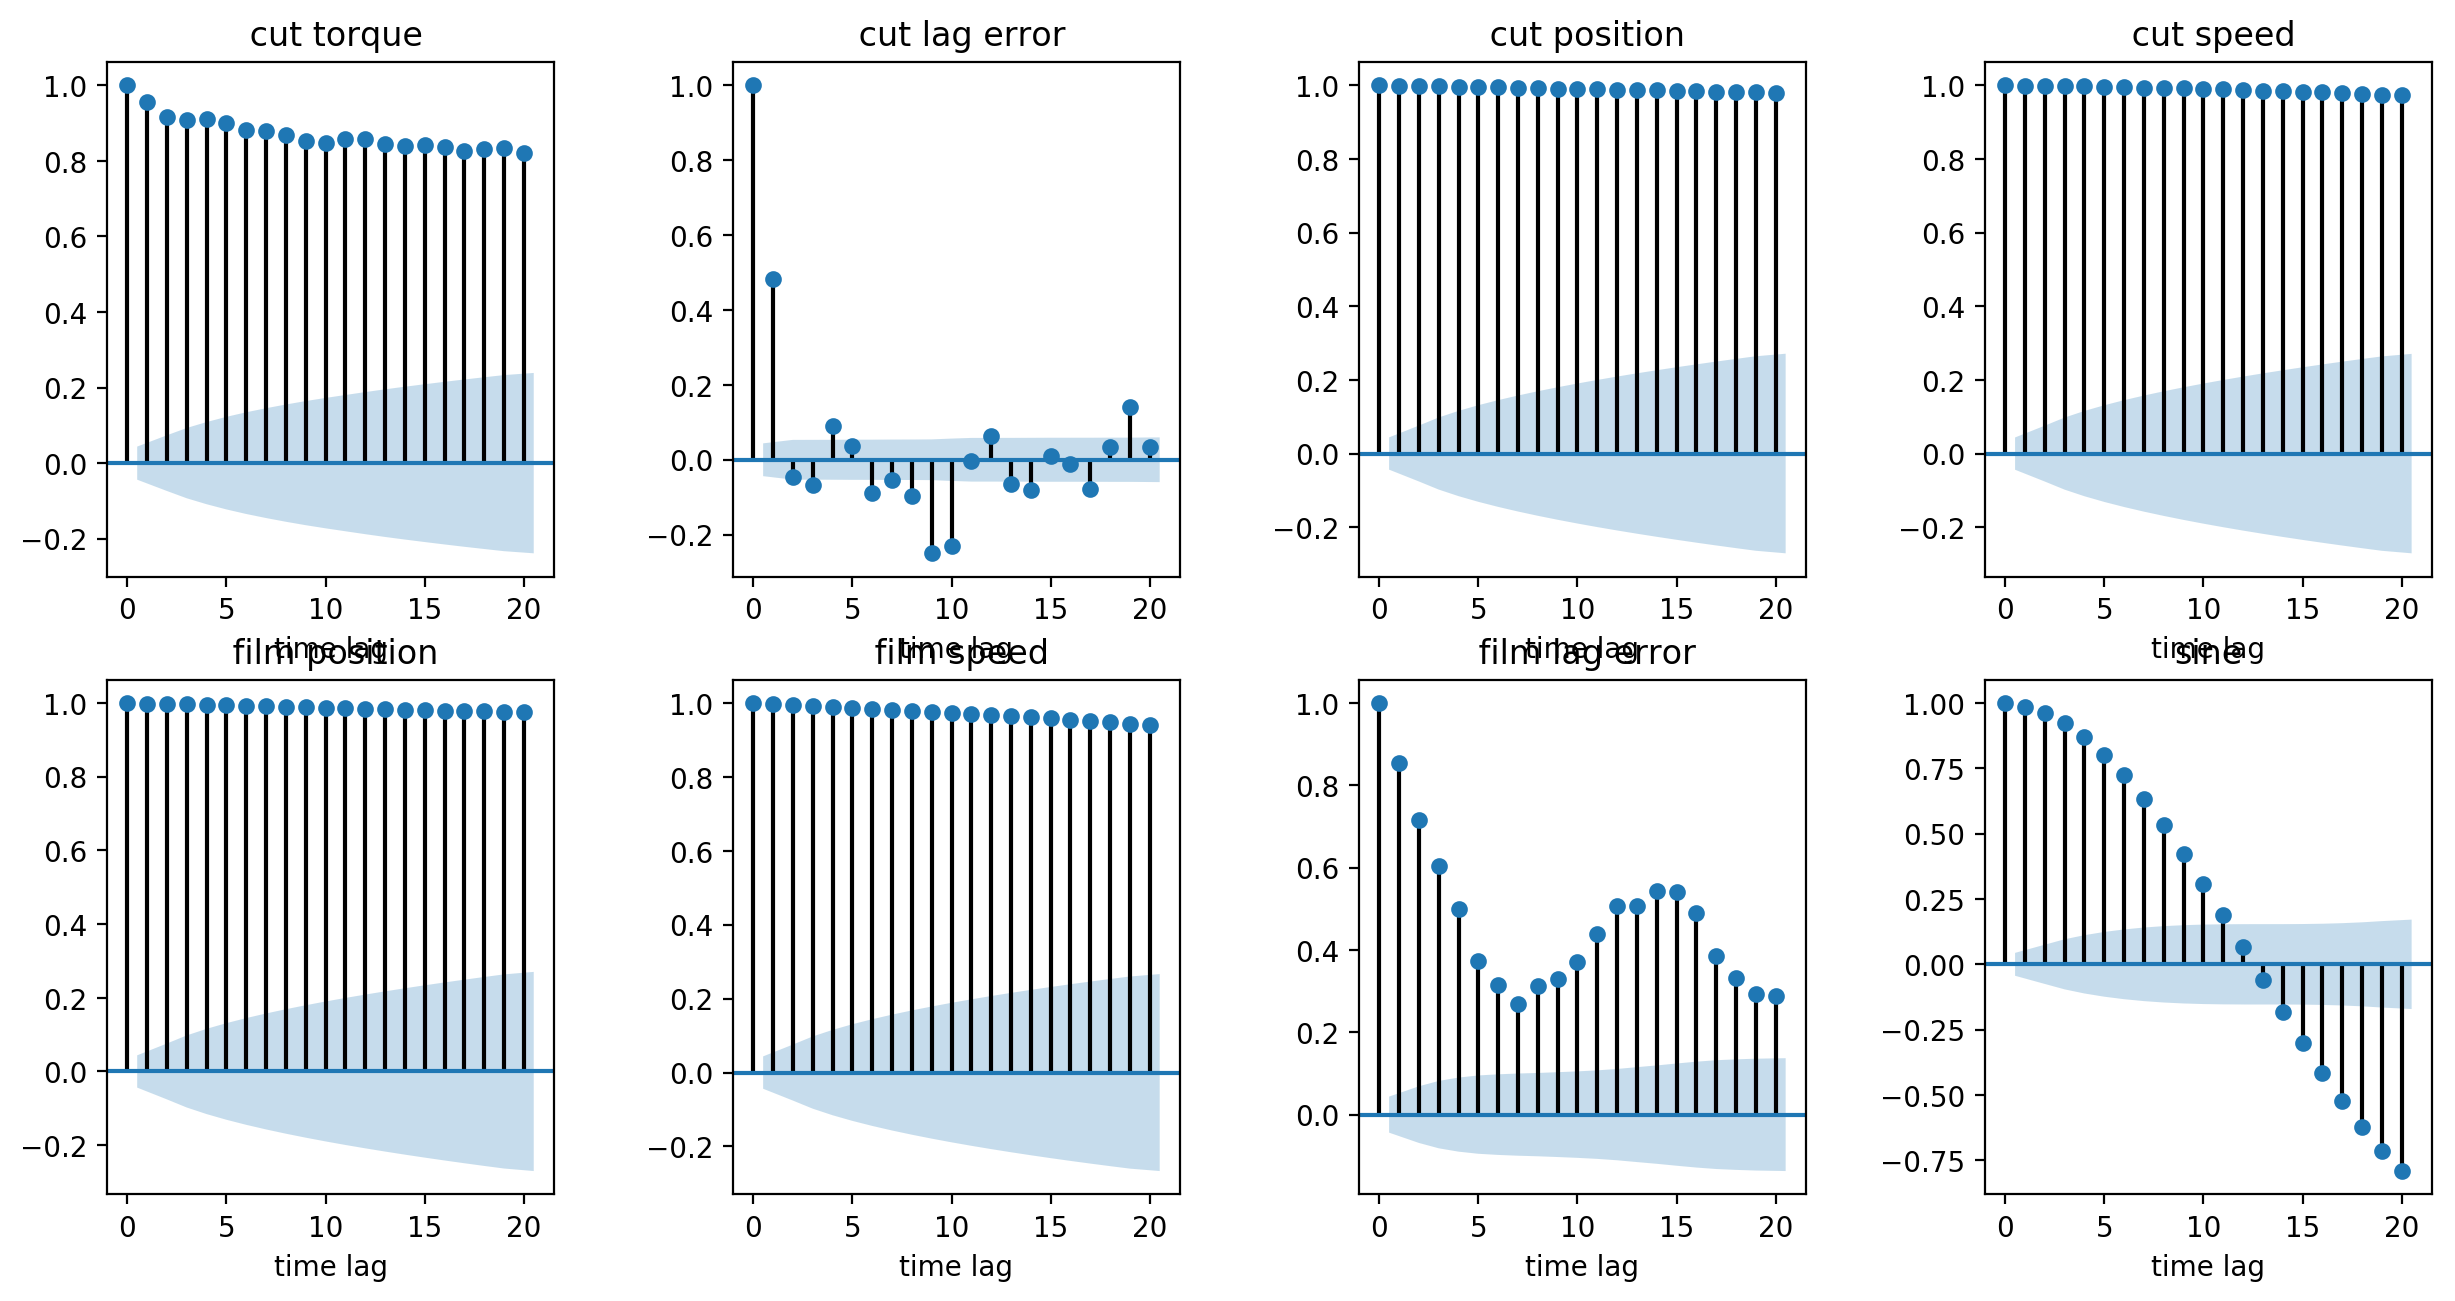

In [8]:
fig, axes = plt.subplots(2, 4, figsize=(15,7.5), dpi=200)
ax = axes.ravel()
plt.subplots_adjust(hspace=0.2, wspace=0.4)
for i in range(1, 9):
    plot_acf(df_original.iloc[:,i], lags=20, ax=ax[i-1])
    ax[i-1].set_title(df_original.columns[i])
    ax[i-1].set_xlabel('time lag')
#plt.savefig("../graphs/raw_sensor_data_autocorrelation.png")
plt.show()

## Histogramm 

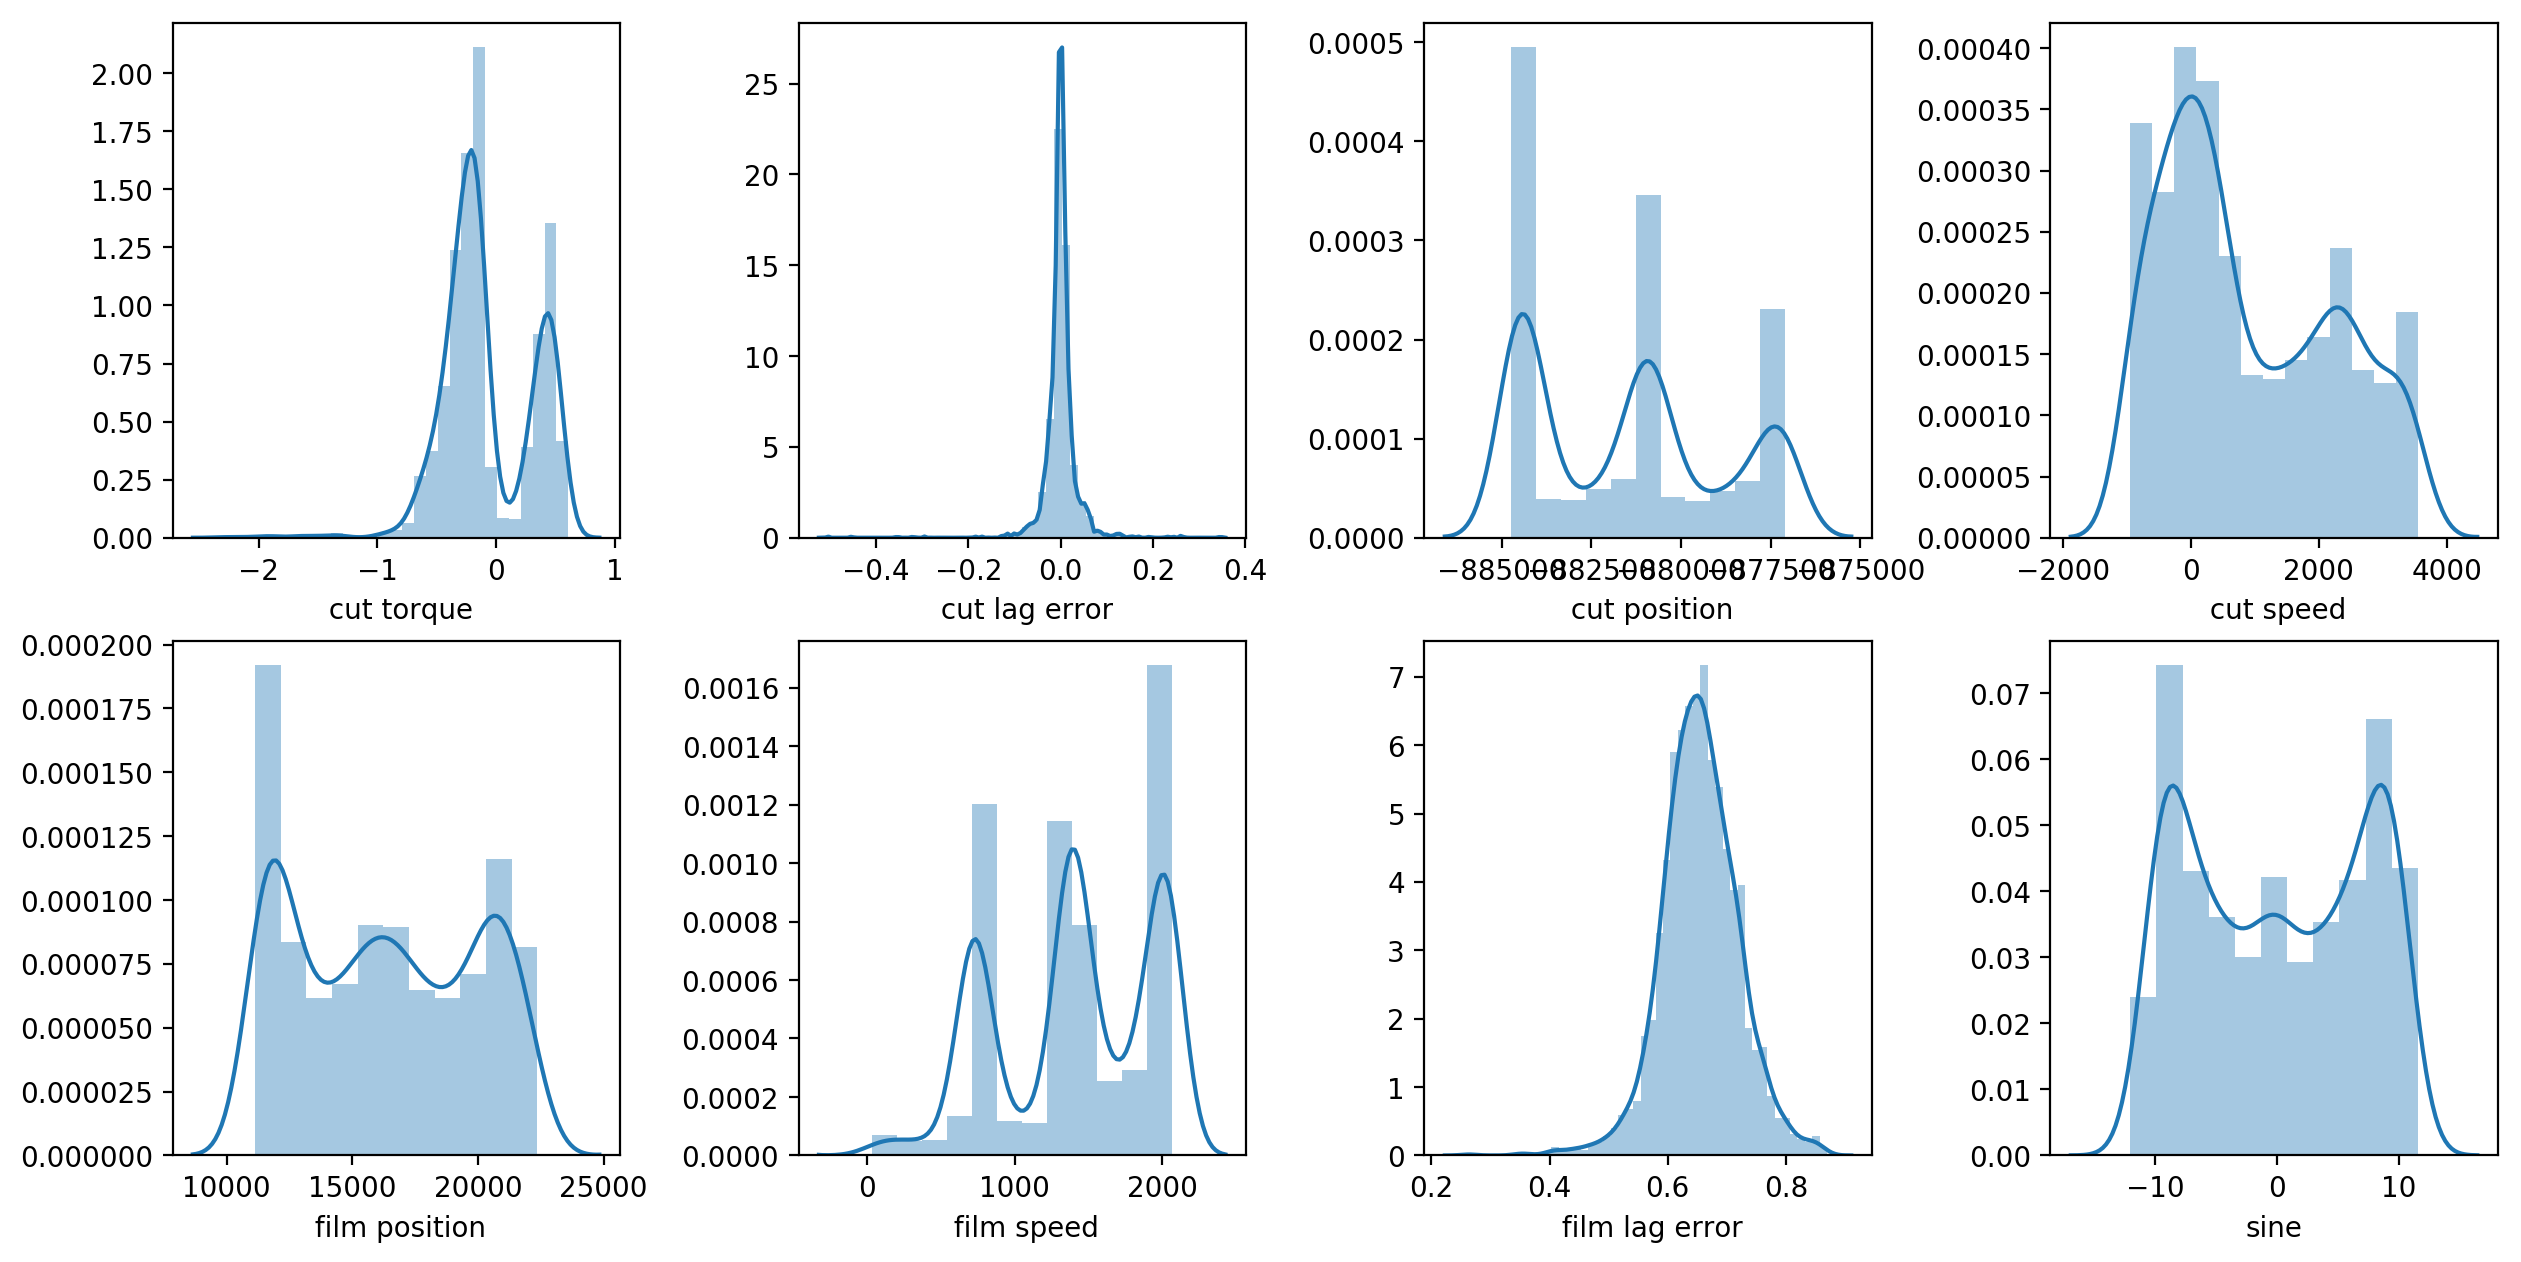

In [9]:
fig, axes = plt.subplots(2, 4, figsize=(15,7.5), dpi=200)
ax = axes.ravel()
plt.subplots_adjust(hspace=0.2, wspace=0.4)
for i in range(1, 9):
    sns.distplot(df_original.iloc[:,i], ax=ax[i-1])
#plt.savefig("../graphs/raw_sensor_data_histogramm.png")
plt.show()

## Augmented Dickey-Fuller Test for Testing Stationarity
If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure. <br>
p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary. <br>
Following time series are non-stationary:
- cut torque
- cut position
- film position

In [10]:
for i in range(1, len(df_original.columns)):
    time_series = df_original.iloc[:,i].values
    result = adfuller(time_series)
    print("Test for: {}".format(df_original.columns[i]))
    print('p-value: {}'.format(result[1]))
    if result[1] >= 0.05:
        print("Time series is non-stationary")
    else:
        print("Time series is stationary")
    print('-'*10)

Test for:  cut torque
p-value: 0.43401230794686557
Time series is non-stationary
----------
Test for:  cut lag error
p-value: 4.334986760192409e-22
Time series is stationary
----------
Test for:  cut position
p-value: 0.9919428056567519
Time series is non-stationary
----------
Test for:  cut speed
p-value: 0.001413591738700251
Time series is stationary
----------
Test for:  film position
p-value: 0.9975578568310594
Time series is non-stationary
----------
Test for:  film speed
p-value: 0.10908325082336734
Time series is non-stationary
----------
Test for:  film lag error
p-value: 0.004450762163448632
Time series is stationary
----------
Test for: sine
p-value: 0.0
Time series is stationary
----------
